# Sound and Wave

In [1]:
%matplotlib inline

import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

## Pure sine wave

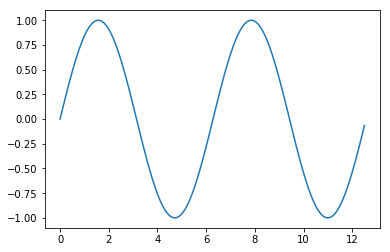

In [2]:
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)
plt.plot(x,y)
plt.show()

## General sine wave

In [3]:
amplitude = 2.0
wavelength = 3.0

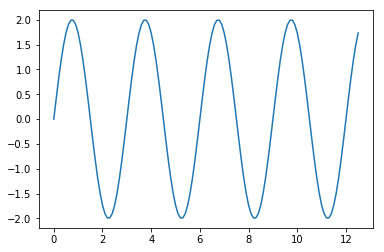

In [4]:
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
k = 2 * np.pi / wavelength
y = amplitude * np.sin(k*x)
plt.plot(x,y)
plt.show()

## Transverse wave propagation

In [5]:
amplitude = 2.0
wavelength = 3.0

In [6]:
%%capture

x = np.arange(0,4*np.pi,0.1)
k = 2 * np.pi / wavelength

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = amplitude * np.sin(k* (x-0.1*i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=120, interval=20, blit=True)

In [7]:
HTML(anim.to_jshtml())

## Longitudinal wave propagation

In [8]:
amplitude = 0.5
wavelength = 3.0

In [9]:
%%capture

k = 2 * np.pi / wavelength

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0,10*np.pi,wavelength/28)
    y = np.arange(0,10*np.pi,wavelength/28)

    p = np.arange(i*0.01-3,10*np.pi-3,wavelength/14)
    d = amplitude * np.sin(k* (p-0.01*i))    
    pd = p + d
    
    count = 0
    for j in np.nditer(pd):
        x[count] = j
        x[count+1] = j
        count = count + 2
    for j in range(round(len(y)/2)):
        if j%2 == 0:
            y[2*j] = -4
            y[2*j+1] = 4
        else:
            y[2*j] = 4
            y[2*j+1] = -4
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=8, blit=True)

In [10]:
HTML(anim.to_jshtml())

## Noticeable difference

In [11]:
frequency = 8000
#frequency = 200

difference_in_cents = 10
#difference_in_cents = 100

In [12]:
difference = difference_in_cents * frequency / 1200
wave1 = thinkdsp.sin_wave(frequency,1)
wave2 = thinkdsp.sin_wave(frequency + difference,1)
wave = wave1 | wave2

wave.make_audio()

## Simple Harmonic Motion

In [13]:
amplitude = 2.0
frequency = 1.0
phase = 0.0

In [14]:
%%capture

period = 1/frequency
delay = 0.01
frame_num = round(period/delay)
q = 2 * np.pi / frame_num

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

line.set_marker(".")

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = amplitude * np.sin(q*i + phase) + 6 
    line.set_data(x, 0)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [15]:
HTML(anim.to_jshtml())

## Vibrating string of the harmonics

In [16]:
amplitude = 2.0
fundamental_frequency = 1.0
phase = 0.0
harmonic = 1

In [17]:
%%capture

period = 1/(fundamental_frequency * harmonic)
delay = 0.01
frame_num = round(period/delay)
wavelength = 24.0 / harmonic
k = 2 * np.pi / wavelength

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0,4*np.pi,0.1)
    y = amplitude * np.sin(2*np.pi*i/frame_num + phase) * np.sin(k*x)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [18]:
HTML(anim.to_jshtml())

## Vibrating string of combined harmonics

In [19]:
fundamental_frequency = 1.0
harmonic_amplitude = [1.0, 0.3, 0.2, 0.1]
phase = [0.0, 0.0, 0.0, 0.0]

In [20]:
%%capture

max_harmonic = len(harmonic_amplitude)
period = 1/fundamental_frequency
delay = 0.01
frame_num = round(period/delay)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0,4*np.pi,0.1)
    y = np.full(len(x),0)
    for h in range(max_harmonic):
        har = h+1
        wavelength = 24.0 / har
        k = 2 * np.pi / wavelength
        y = y + harmonic_amplitude[h] * np.sin(2*np.pi * har*i/frame_num + phase[h]) * np.sin(k*x)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [21]:
HTML(anim.to_jshtml())

## Vibration of air molecule

In [22]:
%%capture

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

line.set_marker(".")

def animate(i):
    x = 0
    for h in range(max_harmonic):
        har = h+1
        x = x + harmonic_amplitude[h] * np.sin(2*np.pi * har*i/frame_num + phase[h])
    x = x + 6
    line.set_data(x, 0)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [23]:
HTML(anim.to_jshtml())

## Sound wave function

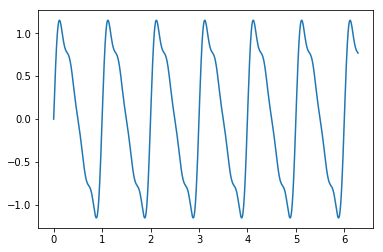

In [24]:
x = np.arange(0,2*np.pi,0.001)   
y = np.full(len(x),0.0)   

for h in range(max_harmonic):
    har = h+1
    freq = har * fundamental_frequency
    k = 2 * np.pi * freq
    y = y + harmonic_amplitude[h] * np.sin(k*x + phase[h])

plt.plot(x,y)
plt.show()

## Sound generated

In [25]:
frequency = 220 * fundamental_frequency
max_amp = max(harmonic_amplitude)
wave = thinkdsp.sin_wave(frequency,2)
wave.scale(harmonic_amplitude[0]/max_amp)

for h in range(1,max_harmonic):
    har = h + 1
    freq = har * frequency
    waveh = thinkdsp.sin_wave(freq,2)
    waveh.scale(harmonic_amplitude[h]/max_amp)
    wave = wave + waveh

wave.normalize()
wave.make_audio()